In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import qeds
%matplotlib inline
import os
import math
import qeds
qeds.themes.mpl_style();

from IPython.display import display
import statistics

In [2]:
bonds = pd.read_csv('10Bonds_ytm.csv')
bonds

,Coupon,bond_name,CAN 0.25 Aug 22,CAN 0.25 Feb 23,CAN 0.25 Aug 23,CAN 0.75 Feb 24,CAN 1.50 Sept 24,CAN 1.25 Mar 25,CAN 0.50 Sept 25,CAN 0.25 Mar 26,...,AI_B1,AI_B2,AI_B3,AI_B4,AI_B5,AI_B6,AI_B7,AI_B8,AI_B9,AI_B10
0,0.25,D1,99.80,99.31,98.80,99.20,100.56,99.64,96.66,95.11,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.25,D2,99.79,99.26,98.80,99.20,100.63,99.67,96.72,95.17,...,-0.002,-0.003,-0.004,-0.006,-0.007,-0.009,-0.010,-0.011,-0.013,-0.014
2,0.25,D3,99.78,99.29,98.78,99.16,100.62,99.61,96.77,95.12,...,-0.003,-0.006,-0.009,-0.011,-0.015,-0.017,-0.020,-0.023,-0.026,-0.029
3,0.75,D4,99.77,99.28,98.76,99.13,100.58,99.59,96.77,95.14,...,-0.005,-0.009,-0.013,-0.017,-0.022,-0.026,-0.030,-0.034,-0.039,-0.043
4,1.50,D5,99.76,99.26,98.73,99.09,100.52,99.49,96.68,95.04,...,-0.006,-0.012,-0.017,-0.023,-0.029,-0.035,-0.040,-0.046,-0.052,-0.057
5,1.25,D6,99.72,99.18,98.61,98.92,100.29,99.25,96.43,97.75,...,-0.011,-0.021,-0.030,-0.040,-0.051,-0.061,-0.071,-0.080,-0.090,-0.100
6,0.50,D7,99.70,99.12,98.55,98.84,100.21,99.12,96.26,94.53,...,-0.012,-0.023,-0.035,-0.046,-0.059,-0.070,-0.081,-0.092,-0.103,-0.114
7,0.25,D8,99.70,99.10,98.54,98.84,100.15,99.11,96.15,94.50,...,-0.014,-0.026,-0.039,-0.051,-0.066,-0.078,-0.091,-0.103,-0.116,-0.128
8,1.00,D9,99.72,99.15,98.55,98.83,100.17,99.10,96.19,94.52,...,-0.015,-0.029,-0.043,-0.057,-0.073,-0.087,-0.101,-0.115,-0.129,-0.143
9,1.25,D10,99.74,99.20,98.61,98.90,100.27,99.26,96.31,94.70,...,-0.017,-0.032,-0.048,-0.063,-0.081,-0.096,-0.111,-0.126,-0.142,-0.157


In [3]:
def lst(df, grp):
    y = df[grp].values.tolist()
    return y

name = ["CAN 0.25 Aug 22", "CAN 0.25 Feb 23", "CAN 0.25 Aug 23", "CAN 0.75 Feb 24", "CAN 1.50 Sept 24", 
        "CAN 1.25 Mar 25", "CAN 0.50 Sept 25", "CAN 0.25 Mar 26", "CAN 1.00 Sept 26", "CAN 1.25 Mar 27"]
cpn = lst(bonds, "Coupon")
t1 = lst(bonds, "ttm1")
t2 = lst(bonds, "ttm2")
t3 = lst(bonds, "ttm3")
t4 = lst(bonds, "ttm4")
t5 = lst(bonds, "ttm5")
t6 = lst(bonds, "ttm6")
t7 = lst(bonds, "ttm7")
t8 = lst(bonds, "ttm8")
t9 = lst(bonds, "ttm9")
t10 = lst(bonds, "ttm10")
b1 = lst(bonds, "CAN 0.25 Aug 22")
b2 = lst(bonds,"CAN 0.25 Feb 23")
b3 = lst(bonds,"CAN 0.25 Aug 23")
b4 = lst(bonds,"CAN 0.75 Feb 24")
b5 = lst(bonds,"CAN 1.50 Sept 24")
b6 = lst(bonds,"CAN 1.25 Mar 25")
b7 = lst(bonds,"CAN 0.50 Sept 25")
b8 = lst(bonds,"CAN 0.25 Mar 26")
b9 = lst(bonds,"CAN 1.00 Sept 26")
b10 = lst(bonds,"CAN 1.25 Mar 27")
ai_b1 = lst(bonds,"AI_B1")
ai_b2 = lst(bonds,"AI_B2")
ai_b3 = lst(bonds,"AI_B3")
ai_b4 = lst(bonds,"AI_B4")
ai_b5 = lst(bonds,"AI_B5")
ai_b6 = lst(bonds,"AI_B6")
ai_b7 = lst(bonds,"AI_B7")
ai_b8 = lst(bonds,"AI_B8")
ai_b9 = lst(bonds,"AI_B9")
ai_b10 = lst(bonds,"AI_B10")

dates = ["Jan 10","Jan 11","Jan 12","Jan 13","Jan 14","Jan 17","Jan 18","Jan 19","Jan 20","Jan 21"]
ttm = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10]
accrued_i = [ai_b1, ai_b2,ai_b3,ai_b4,ai_b5,ai_b6,ai_b7,ai_b8,ai_b9,ai_b10]
bd = [b1,b2,b3,b4,b5,b6,b7,b8,b9,b10]

In [4]:
def bond_ytm(price, par, T, coup, guess=0.05):
    T = float(T)
    dt = [(i+1)/2 for i in range(int(T))]
    ytm_func = lambda y: \
    sum([coup*math.exp((-1)*y*t) for t in dt]) + par*math.exp((-1)*y*T) - price
    return optimize.newton(ytm_func, guess)


ytm_all = []
for b in bd:
    for ai in accrued_i:
        for t in ttm:
            ytm_fl = []
            for i in range(10):
                y = bond_ytm((b[i]+ai[i]), 100, t[i], cpn[i])
                ytm_fl.append(y)
    ytm_float = [round(elem, 5) for elem in ytm_fl]
    ytm_all.append(ytm_float)

ytm_all

[[0.00283,
  0.00288,
  0.00293,
  0.00791,
  0.01547,
  0.01315,
  0.00574,
  0.0033,
  0.01074,
  0.01325],
 [0.0038,
  0.00393,
  0.0039,
  0.0089,
  0.0165,
  0.01426,
  0.0069,
  0.00449,
  0.01191,
  0.01436],
 [0.00481,
  0.00484,
  0.00491,
  0.00995,
  0.0176,
  0.01544,
  0.00805,
  0.00561,
  0.01314,
  0.01559],
 [0.00402,
  0.00405,
  0.00416,
  0.0092,
  0.01686,
  0.01479,
  0.00746,
  0.00501,
  0.01256,
  0.01498],
 [0.00134,
  0.00123,
  0.00128,
  0.00629,
  0.01391,
  0.01198,
  0.00472,
  0.00241,
  0.00983,
  0.01216],
 [0.00315,
  0.00312,
  0.00327,
  0.00827,
  0.01603,
  0.01411,
  0.0069,
  0.00447,
  0.01201,
  0.01424],
 [0.00911,
  0.00902,
  0.00895,
  0.01403,
  0.02193,
  0.02001,
  0.01273,
  0.01046,
  0.01807,
  0.02043],
 [0.01228,
  0.0122,
  0.01234,
  0.01743,
  0.02545,
  0.01723,
  0.01635,
  0.01388,
  0.02163,
  0.02389],
 [0.00709,
  0.00704,
  0.00713,
  0.01213,
  0.02002,
  0.0183,
  0.01116,
  0.0088,
  0.01636,
  0.0185],
 [0.00559,
  0

In [5]:
ytm_dict = {"ytm1": ytm_all[0], "ytm2": ytm_all[1], "ytm3": ytm_all[2], "ytm4": ytm_all[3],
           "ytm5": ytm_all[4], "ytm6": ytm_all[5], "ytm7": ytm_all[6], "ytm8": ytm_all[7],
           "ytm9": ytm_all[8], "ytm10": ytm_all[9]}

ttm_dict = {"t1": ttm[0], "t2": ttm[1], "t3": ttm[2], "t4": ttm[3],
           "t5": ttm[4], "t6": ttm[5], "t7": ttm[6], "t8": ttm[7],
           "t9": ttm[8], "t10": ttm[9]}

ttm_df = pd.DataFrame(ttm_dict)
ttmT_df = ttm_df.T.reset_index()
ytm_df = pd.DataFrame(ytm_dict)
ytmT_df = ytm_df.T.reset_index()

ytms = pd.merge(ttmT_df, ytmT_df, left_index=True, right_index=True)
ytms

,index_x,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y
0,t1,0.556,0.553,0.550,0.547,0.544,0.536,0.533,0.531,0.528,...,0.00283,0.00288,0.00293,0.00791,0.01547,0.01315,0.00574,0.00330,0.01074,0.01325
1,t2,1.056,1.053,1.050,1.047,1.044,1.036,1.033,1.031,1.027,...,0.00380,0.00393,0.00390,0.00890,0.01650,0.01426,0.00690,0.00449,0.01191,0.01436
2,t3,1.556,1.553,1.550,1.547,1.544,1.536,1.533,1.531,1.528,...,0.00481,0.00484,0.00491,0.00995,0.01760,0.01544,0.00805,0.00561,0.01314,0.01559
3,t4,2.056,2.053,2.050,2.047,2.044,2.036,2.033,2.031,2.027,...,0.00402,0.00405,0.00416,0.00920,0.01686,0.01479,0.00746,0.00501,0.01256,0.01498
4,t5,2.639,2.636,2.633,2.631,2.628,2.619,2.617,2.614,2.611,...,0.00134,0.00123,0.00128,0.00629,0.01391,0.01198,0.00472,0.00241,0.00983,0.01216
5,t6,3.139,3.136,3.133,3.131,3.128,3.119,3.117,3.114,3.111,...,0.00315,0.00312,0.00327,0.00827,0.01603,0.01411,0.00690,0.00447,0.01201,0.01424
6,t7,3.639,3.636,3.633,3.631,3.628,3.619,3.617,3.614,3.611,...,0.00911,0.00902,0.00895,0.01403,0.02193,0.02001,0.01273,0.01046,0.01807,0.02043
7,t8,4.139,4.136,4.133,4.131,4.128,4.119,4.117,4.114,4.111,...,0.01228,0.01220,0.01234,0.01743,0.02545,0.01723,0.01635,0.01388,0.02163,0.02389
8,t9,4.639,4.636,4.633,4.631,4.628,4.619,4.617,4.614,4.611,...,0.00709,0.00704,0.00713,0.01213,0.02002,0.01830,0.01116,0.00880,0.01636,0.01850
9,t10,5.139,5.136,5.133,5.131,5.128,5.119,5.117,5.114,5.111,...,0.00559,0.00550,0.00567,0.01060,0.01848,0.01681,0.00977,0.00738,0.01494,0.01698


In [6]:
col1 = lst(ytms, "0_x")
col2 = lst(ytms, "1_x")
col3 = lst(ytms, "2_x")
col4 = lst(ytms, "3_x")
col5 = lst(ytms, "4_x")
col6 = lst(ytms, "5_x")
col7 = lst(ytms, "6_x")
col8 = lst(ytms, "7_x")
col9 = lst(ytms, "8_x")
col10 = lst(ytms, "9_x")
maturity = [col1,col2,col3,col4,col5,col6,col7,col8,col9,col10]

y1 = lst(ytms, "0_y")
y2 = lst(ytms, "1_y")
y3 = lst(ytms, "2_y")
y4 = lst(ytms, "3_y")
y5 = lst(ytms, "4_y")
y6 = lst(ytms, "5_y")
y7 = lst(ytms, "6_y")
y8 = lst(ytms, "7_y")
y9 = lst(ytms, "8_y")
y10 = lst(ytms, "9_y")
y = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]

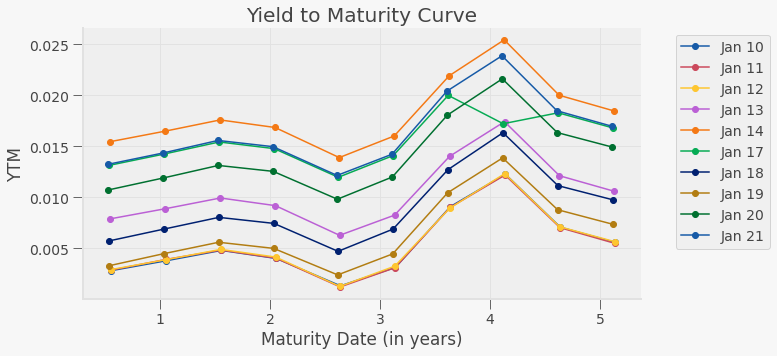

In [7]:
plt.figure(figsize=(10,5))
for i in range(0, 10):
    plt.plot(maturity[i], y[i], label=dates[i],marker='o')
plt.xlabel('Maturity Date (in years)')
plt.ylabel('YTM')

plt.title("Yield to Maturity Curve")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');